# Introduction to Simple Linear Regression using method of Least Squares
----
In this tutorial, you will learn how to fit a regression line to some data.   
You will remember from High School that a straight line can be described using the following equation:   

$$ y = ax + b$$   
where $b$ is the intercept of the line with the y-axis, and $a$ is the gradient.   

<img src="https://upload.wikimedia.org/wikipedia/en/thumb/c/c8/Linear-equations-two-unknowns.svg/694px-Linear-equations-two-unknowns.svg.png" alt="drawing" width="200"/>
   
Using the equation above, it would be possible to predict a value for y, for any given value of x. In this tutorial you will learn how to fit a line to some data for the purpose of predicting values of y from values of x.     

## Getting started 
First, we will import the Python libraries which we will need to work with.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

**Next** we will load our data as a Pandas DataFrame.

In [2]:
df = pd.read_csv('data_1.csv', index_col=0)

In [3]:
# view the first 10 rows of the DataFrame
df.head(10)

,ZAR/USD,Value of Exports (ZAR)
2008M01,7.01,39356.82
2008M02,7.66,46946.33
2008M03,7.97,51150.89
2008M04,7.79,56174.34
2008M05,7.62,56240.45
2008M06,7.92,60159.93
2008M07,7.63,61268.16
2008M08,7.66,60390.94
2008M09,8.06,61067.34
2008M10,9.74,65652.57


So it looks like we have some monthly data for both the Rand:Dollar exchange rate, and the value of South African exports.   

In this case, we will choose the Rand/Dollar exchange rate as our dependent variable and the monthly value of exports (in Rands) as our independent variable - i.e. we are going to use exports as a predictor for currency value.

For ease of future reference, let's change our column names to reflect the notation which we'll be following going forward:

In [8]:
df.columns = ['Y', 'X']
df.head()

,Y,X
2008M01,7.01,39356.82
2008M02,7.66,46946.33
2008M03,7.97,51150.89
2008M04,7.79,56174.34
2008M05,7.62,56240.45


In [9]:
a = np.arange(len(df.Y))
print(a)              

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]


**Let's create a few plots of the data** using the matplotlib libarary.

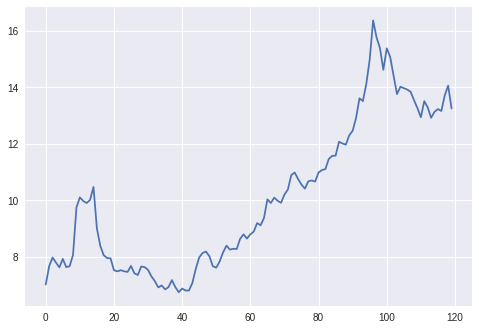

In [5]:
# ZAR/USD over time
plt.plot(np.arange(len(df.Y)), df.Y)
plt.show()

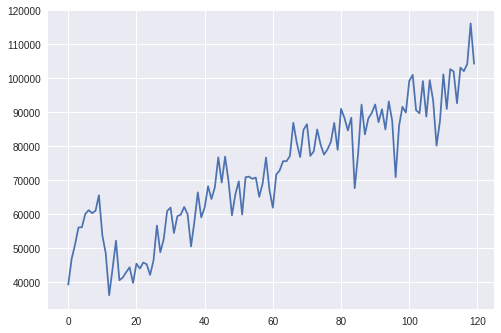

In [6]:
# Value of Exports over time
plt.plot(np.arange(len(df.X)), df.X)
plt.show()

## Advanced plotting
Let's try and create something a little more visually appealing than the two plots above.

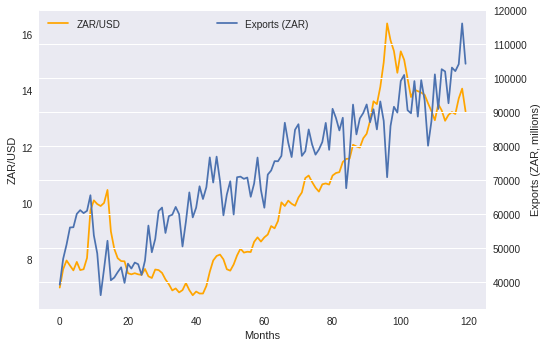

In [7]:
rc('mathtext', default='regular')
# create blank figure
fig = plt.figure()

# split figure to allow two sets of y axes
ax = fig.add_subplot(111)

# plot the first line on its axis
ax.plot(np.arange(len(df.Y)), df.Y, '-', label = 'ZAR/USD', color='orange')

# create second y axis and plot second line
ax2 = ax.twinx()
ax2.plot(np.arange(len(df.X)), df.X, '-', label = 'Exports (ZAR)')

# add legends for each axis
ax.legend(loc=2)
ax2.legend(loc=9)

ax.grid()

# set labels of axes
ax.set_xlabel("Months")
ax.set_ylabel("ZAR/USD")
ax2.set_ylabel("Exports (ZAR, millions)")
plt.show()

# Let's get started with regression
So the plots above - although they are easy to interpret - show too many variables. We have our Y, our X, and time (months), but we're just trying to model ZAR/USD as a *function* of Exports.   

It's important to note here that we are **not** trying to model the exchange rate as a function of time - that's a whole other [interesting field](https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/) which will be covered in other tutorials, but we won't get into that here.
   
Let's try and show the relationship between the two variables using a scatter plot.

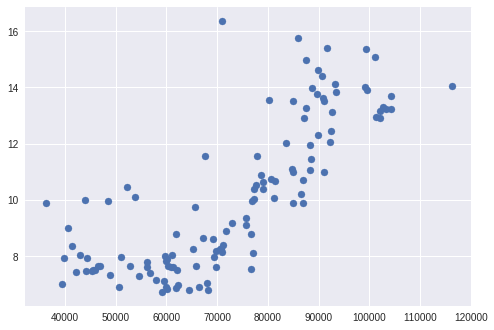

In [8]:
plt.scatter(df['X'], df['Y'])
plt.show()

From the plot above, we can see that there possibly exists a linear relationship between the two variables: **Value of Exports** and **ZAR/USD**.

We would like to be able to fit a line to this data such that we can make predictions of Y for new values of X. We would like to calculate values for $a$ and $b$ such that the line represented by $y = ax + b$ lies as close as possible to the points shown in the scatter plot above.

## Finding the Best Fit Line
Let's say we have estimated some values for $a$ and $b$. We could plug in all of our values of X to find the corresponding values of Y. These *new* values of Y could be compared to the *actual* values of Y to assess the fit of the line.   
   
Looking at the data, we can make a guess at the values of the slope and intercept of the line. We'll use a rough estime of the slope as $\frac{rise}{run} = \frac{16}{80000} = 0.0002$. For the intercept, we'll just take a guess and call it $-3$.   
   
Let's plot a line with values of $a = -3$, and $b = 0.0002$:   
   
First, we will need to generate some values of y using the following formula:
   
$$\hat{y}_i = a + bx_i$$   
   

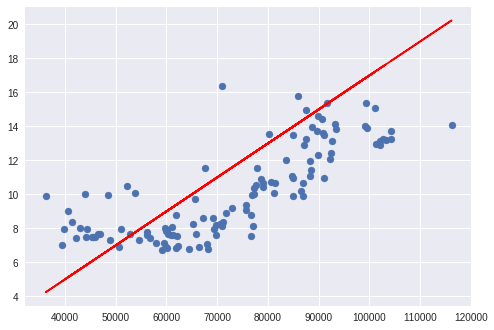

In [9]:
# define a function to generate values of y from a list of x, 
# given parameters a and b

def gen_y(x_list, a, b):
    y_gen = []
    for x_i in df.X:
        y_i = a + b*x_i
        y_gen.append(y_i)
    
    return(y_gen)

# generate the values by invoking the 'gen_y' function
y_gen = gen_y(df.X, -3, 0.0002)

# plot the results
plt.scatter(df.X, df.Y)  # plot the original data
plt.plot(df.X, y_gen, color='red')  # plot the line connecting the generated y-values
plt.show()

At first glance, it looks like the fit of this line is not too bad!   
   
**Let's check the fit of the line** by measuring how far the true y-values of each point are from their corresponding y-value on the line.   
   
We'll use the equation below to calculate the error of each generated value of y:   
   
$$e_i = y_i - \hat{y}_i$$   
   

In [10]:
errors = np.array(y_gen - df.Y)
np.round(errors, 2)

array([-2.14, -1.27, -0.74,  0.44,  0.63,  1.11,  1.62,  1.42,  1.15,
        0.39, -2.32, -3.26, -5.65, -4.2 , -3.02, -3.87, -3.09, -2.44,
       -2.06, -2.96, -1.41, -1.66, -1.35, -1.41, -2.02, -1.38,  0.94,
       -0.57, -0.09,  1.57,  1.88,  0.61,  1.77,  2.07,  2.46,  2.18,
        0.2 ,  1.42,  3.38,  2.09,  2.53,  3.86,  3.11,  3.54,  4.79,
        2.91,  4.27,  2.78,  0.94,  2.52,  3.34,  1.17,  3.04,  2.84,
        2.85,  2.89,  1.77,  2.19,  3.56,  1.8 ,  0.61,  2.46,  2.4 ,
        3.03,  2.76,  2.41,  4.49,  3.14,  2.4 ,  4.07,  4.11,  2.06,
        1.83,  3.02,  2.36,  1.97,  2.41,  2.59,  3.69,  2.14,  4.23,
        3.6 ,  2.84,  3.23, -1.03,  0.99,  3.39,  1.7 ,  2.68,  2.67,
        3.01,  1.51,  1.58,  0.49,  1.53, -0.49, -5.18, -1.57, -0.06,
        0.37,  1.47,  2.13,  0.72,  1.19,  2.83,  0.78,  2.98,  1.86,
       -0.5 ,  1.24,  4.3 ,  1.69,  4.25,  4.49,  2.41,  4.41,  4.27,
        4.13,  6.18,  4.61])

When looking at the errors, we see that some of our predictions are off by almost R7!

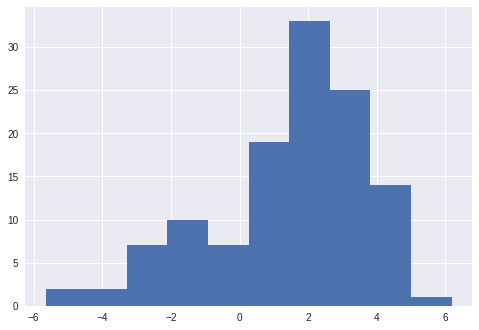

In [11]:
plt.hist(errors)
plt.show()

In addition to having some very large errors, we can also see that most of the errors are positive numbers. Ideally, we want our errors to be evenly distributed either side of zero - we want our line to best fit the data, i.e. no bias.
   
We can measure the overall error of the fit by calculating the **Residual Sum of Squares**:
   
$$RSS = \sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [12]:
print("Residual sum of squares:", (errors ** 2).sum())

Residual sum of squares: 867.1710481532764


## Least Squares Method
Least Squares is another method that allows us to find the line of best fit while enforcing the constraint of minimising the residuals. More specifically, the **Least Squares Criterion** states that the sum of the squares of the residuals should be minimized, i.e.   
$$Q = \sum_{i=1}^n(y_i-\hat{y}_i)^2$$

The formulae for the intercept, $a$, and the slope, $b$, are determined by minimizing the equation for the sum of the squared prediction errors:   
$$Q = \sum_{i=1}^n(y_i-(a+bx_i))^2$$

Optimal values for $a$ and $b$ are found by differentiating $Q$ with respect to $a$ and $b$, setting both equal to 0 and then solving for $a$ and $b$.   
   
We won't go into the [derivation process](http://seismo.berkeley.edu/~kirchner/eps_120/Toolkits/Toolkit_10.pdf) here, but the equations for $a$ and $b$ are:   
   
$$b = \frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}$$   
   
and:   
   
$$a = \bar{y} - b\bar{x}$$   
   
**Let's calculate these values in Python!**

In [13]:
X = df.X.values
Y = df.Y.values

# Calculate x bar, y bar
x_bar = np.mean(X)
y_bar = np.mean(Y)

# Calculate slope
b = sum( (X-x_bar)*(Y-y_bar) ) / sum( (X-x_bar)**2 )

# Calculate intercept
a = y_bar - b*x_bar

print("Slope = " + str(b))
print("Intercept = " + str(a))

Slope = 0.000113507257658843
Intercept = 1.8448114670426463


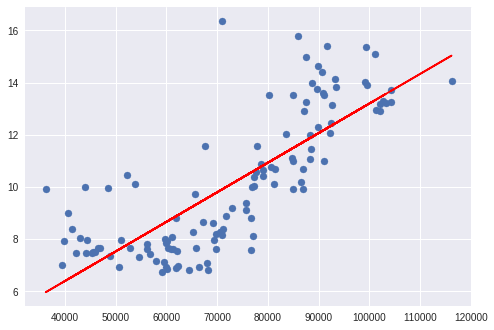

In [14]:
y_gen2 = gen_y(df.X, a, b)

plt.scatter(df.X, df.Y)
plt.plot(df.X, y_gen2, color='red')
plt.show()

In [15]:
errors2 = np.array(y_gen2 - df.Y)
print(np.round(errors2, 2))

[-0.7  -0.49 -0.32  0.43  0.61  0.75  1.17  1.04  0.72 -0.44 -2.14 -2.62
 -3.94 -3.16 -2.69 -2.54 -1.83 -1.32 -1.06 -1.57 -0.51 -0.63 -0.47 -0.49
 -0.82 -0.55  0.87  0.04  0.19  1.14  1.36  0.74  1.47  1.74  1.93  1.82
  0.67  1.25  2.47  1.82  2.01  2.8   2.37  2.5   2.99  1.75  2.46  1.58
  0.62  1.66  2.15  0.82  1.75  1.53  1.59  1.61  0.98  1.06  1.77  0.83
  0.09  1.1   0.93  1.32  1.06  0.58  1.82  0.96  0.59  1.57  1.47  0.23
 -0.12  0.51  0.24  0.1   0.41  0.4   1.01  0.15  1.2   0.8   0.36  0.42
 -2.04 -0.9   0.25 -0.68 -0.11 -0.26 -0.13 -1.19 -1.44 -2.02 -1.69 -3.21
 -6.47 -4.16 -3.14 -2.56 -2.27 -1.77 -2.27 -1.73 -0.91 -2.05 -0.78 -1.38
 -2.59 -1.49  0.39 -1.33  0.21  0.51 -0.76  0.33  0.28 -0.04  0.97  0.44]


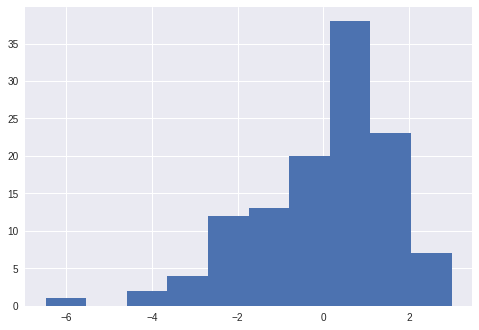

In [16]:
plt.hist(errors2)
plt.show()

In [17]:
print("Residual sum of squares:", (errors2 ** 2).sum())

Residual sum of squares: 321.45716655257655


Here we can see our RSS has improved from 867.33 down to 321.41.  
Furthermore, if we calculate the sum of the errors we find that the value is close to 0.

In [18]:
# round off to 11 decimal places
np.round(errors2.sum(),11)

-0.0

----
Intuitively, this should make sense as it is an indication that the sum of the positive errors is equal to the sum of the negative errors. The line fits in the 'middle' of the data.   

**To summarise:**   
We learnt how to:
* create line plots of variables over time.
* create a scatter plot of two continuous variables.   
* use the method of least squares to fit a regression line to some data.   
* assess the fit of a regression line using the residual sum of squares.   
